In [2]:
import numpy as np
import pandas as pd
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import svm

# Question 1 (Programming) (40 points)

1. Read the medical data: chronic kidney disease `ckd.csv` and save it as `kidney`.
2. The column `Class` defines the labels. `Class` = 1 indicates the patient has the disease and `Class` = 0 indicates the patient do not have the disease. List all the predictors this data has.   

In [3]:
kidney = pd.read_csv('ckd.csv')
list(kidney.columns)

['Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cell',
 'Pus Cell clumps',
 'Bacteria',
 'Blood Glucose Random',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Class']

Note that lot of predictors are qualitative. Some quantitaive variables/predictor have different scales. We will select few of the predictors and work in standard units. Then we donot have to worry about the scales of different variables.

We will Standardized the predictors with the following function : `standard_units`

In [4]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

3. Extract the columns `Class`, `White Blood Cell Count`, `Blood Glucose Random`, `Hemoglobin` from the data, kidney.
4. Scatter plot with `White Blood Cell Count` as X Axis and `Blood Glucose Random` as Y Axis. Color the different observation with different colors for Class 0 and Class 1. Add a legend to the plot for different classes.

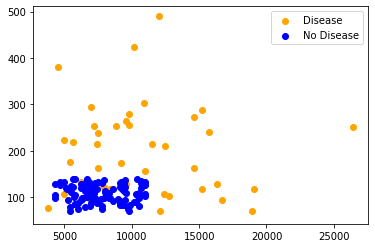

In [5]:
A = kidney[['White Blood Cell Count', 'Blood Glucose Random', 'Hemoglobin', 'Class']]
A = A.to_numpy()
wbc = A[:,0]
glu = A[:,1]
hemo = A[:,2]
label = A[:,3]
plt.scatter(wbc[label == 1], glu[label == 1], color = 'orange', label = "Disease" )
plt.scatter(wbc[label == 0], glu[label == 0], color = 'blue', label = "No Disease")
plt.legend(loc="upper right")
plt.show()

5. Redo the scatter plot with `Hemoglobin` and `Blood Glucose Random` and with different colors for Class 0 and Class 1. Add a legend to the plot for different classes.

#### Then compare 4 and 5 and comment which two predictors are better in Classifying the disease and non disease patients ?

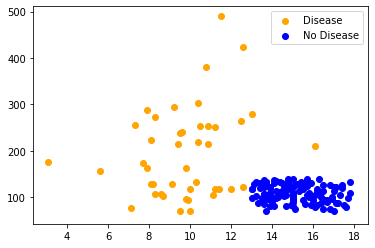

In [6]:
plt.scatter(hemo[label == 1], glu[label == 1], color = 'orange', label = "Disease" )
plt.scatter(hemo[label == 0], glu[label == 0], color = 'blue', label = "No Disease")
plt.legend(loc="upper right")
plt.show()

### Ans:  `Hemoglobin` and `Blood Glucose Random` are better predictors in classifying the disease and non disease patients.

6. Between Q4 and Q5, where is it possible to find a `Maximal Marginal Classifier`? Explain.

#### Ans.  Itis possible to find the `Maximal Marginal Classifier` classifier for Q5 because both the classes are completely separated. Whereas for Q4, it is not possible to find a separating hyperplane, because the classes are non-separable and highly overlapping. 

7. `Hemoglobin` and `Blood Glucose Random` have different scales. We will work in standard units. Then we donot have to worry about the scales of different variables. Standardized the predictors with the function : `standard_units`. And redo the scatter plot for Q5. And focus the plot only for X Axis = (-2, 2) and YAxis = (-2,2)

In [7]:
hemo = standard_units(hemo)
glu  = standard_units(glu)

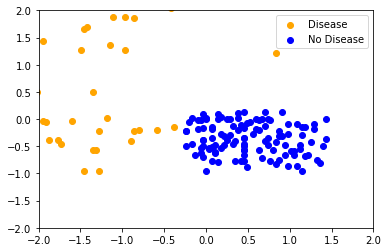

In [8]:
plt.scatter(hemo[label == 1], glu[label == 1], color = 'orange', label = "Disease" )
plt.scatter(hemo[label == 0], glu[label == 0], color = 'blue', label = "No Disease")
plt.legend(loc="upper right")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

7.  Fit a Support Vector Classifier and Support Vector Machine Classifier using `linear` kernel to simply fit a classifier on Q5. You will use the stanadrdized values of the predictors `Hemoglobin` and `Blood Glucose Random`. 
##### And find the support vectors .

### WARNING: In sklearn package,  in svm module, A `low C` makes the decision surface smooth, while a `high C` aims at classifying all training examples correctly, which is opposite in theory we learnt. Set `C = 1000` to make the decision boundary smooth. 

In [64]:
X = np.column_stack([hemo, glu])
y = label
svc = svm.SVC(kernel='linear', C=1000)
svc.fit(X, y)
svc.support_vectors_

array([[-0.16962413,  0.02561603],
       [ 0.8397496 ,  1.21509914],
       [-0.37846008, -0.14431013]])

8. a) Plot the **support vectors** in RED. Add the data in the Background

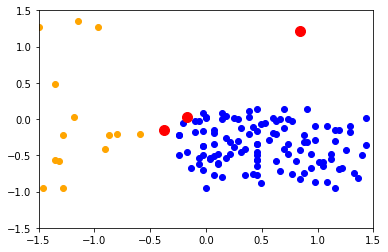

In [65]:
plt.scatter(hemo[label == 1], glu[label == 1], color = 'orange')
plt.scatter(hemo[label == 0], glu[label == 0], color = 'blue')
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], color = "red", s = 100)
np.meshgrid
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

9. Fit a  Support Vector Machine Classifier using `Radial` kernel to simply fit a classifier on Q5. You will again use the predictors `Hemoglobin` and `Blood Glucose Random`. 

##### And find the support vectors .

In [66]:
svc = svm.SVC(kernel='rbf', C = 1000)
svc.fit(X, y)
svc.support_vectors_

array([[-0.20443012, -0.05162314],
       [-0.23923611, -0.2215493 ],
       [ 0.8397496 ,  1.21509914],
       [-0.37846008, -0.14431013]])

10. Plot the Support Vector Machine Decision Boundary. Plot the **support vectors** in RED. Add the data in the Background

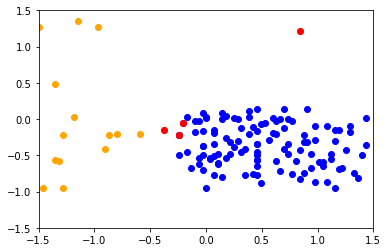

In [67]:
plt.scatter(hemo[label == 1], glu[label == 1], color = 'orange')
plt.scatter(hemo[label == 0], glu[label == 0], color = 'blue')
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], color = "red")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

# Question 2 (Theoretical and Programming) [40 points]

a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label. 


| Obs. | $X_1$ | $X_2$ | $Y$   |
|------|-------|-------|-------|
| 1    | 3     | 4     | Red   |
| 2    | 2     | 2     | Red   |
| 3    | 4     | 4     | Red   |
| 4    | 1     | 4     | Red   |
| 5    | 2     | 1     | Blue  |
| 6    | 4     | 3     | Blue  |
| 7    | 4     | 1     | Blue  |


Sketch the observation. And color code them.


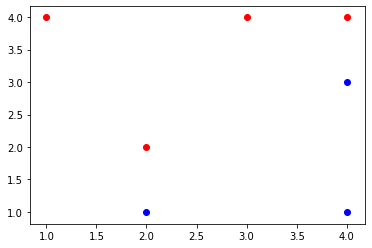

In [68]:
d = {'X1':[3,2,4,1,2,4,4], 'X2' : [4,2,4,4,1,3,1], 'Y':['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']}
df = pd.DataFrame(d)
data = df.to_numpy()
X1 = data[:, 0]
X2 = data[:, 1]
Y  = data[:,2]
plt.scatter(X1[Y=="red"], X2[Y=="red"], color = 'red')
plt.scatter(X1[Y=="blue"], X2[Y=="blue"], color = 'blue')

b) Convert Y into a numerical binary variable and save is a lower case `y`. Find the supporting vectors for the OPTIMAL separating Hyperplane

In [69]:
## The support vectors are 
X = np.transpose(np.vstack([X1,X2]).astype(float))
y = np.ones(7)
y[Y == "red"] = 0

svc = svm.SVC(kernel='rbf', C = 1)
svc = svm.SVC(kernel='linear')
svc.fit(X, y)
supp_vec = svc.support_vectors_
print(supp_vec)

[[2. 2.]
 [4. 4.]
 [2. 1.]
 [4. 3.]]


##### Ans:  There are 4 Support vectors  =   Obs: 2 , 3, 5 and 6 

c) Plot the support vectors on the scatter plot in `color = 'gold'`. Add the ther observations as well to get a perspective.

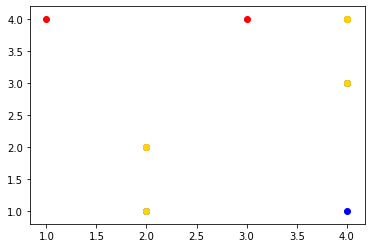

In [70]:
y = np.ones(7)
y[Y == "red"] = 0
plt.scatter(X1[Y=="red"], X2[Y=="red"], color = 'red')
plt.scatter(X1[Y=="blue"], X2[Y=="blue"], color = 'blue')
plt.scatter(supp_vec[:,0], supp_vec[:,1], color = 'gold')

d) Find the maximal GAP between the classes. Without sketching, comment where should you draw the MArGIN and the OPTIMAL separating Hyperplane. 

In [71]:
gap1 = np.square(np.sum((supp_vec[0,:] - supp_vec[2,:])**2))
gap2 = np.square(np.sum((supp_vec[1,:] - supp_vec[3,:])**2))
print(gap1)
print(gap2)

1.0
1.0


#####  Ans. The maximal gap is the euclidean distance between Obs 2 and 5  =  1  and  between Obs 3 and 6 = 1 
##### So the Margin will pass through Obs 2 and 3  for Red class. And Second Margin will pass through Obs 5 and 6 for Blue class. 
##### And  The Optimal separating Hyperplane should be the MIDLINE drawn between the two Margin. 

e) Plot the Margin and the Optimal Separating Hyperplane along with the data.

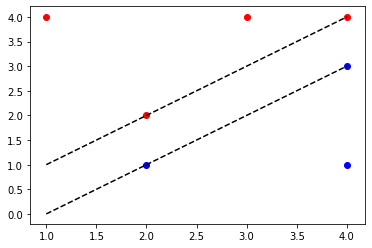

In [72]:
## The Maximal MARGINs
plt.scatter(X1[Y=="red"], X2[Y=="red"], color = 'red')
plt.scatter(X1[Y=="blue"], X2[Y=="blue"], color = 'blue')
plt.plot([1,2,4], [1,2,4], color = 'black', linestyle = 'dashed')
plt.plot([1,2,4], [0,1,3], color = 'black', linestyle = 'dashed')

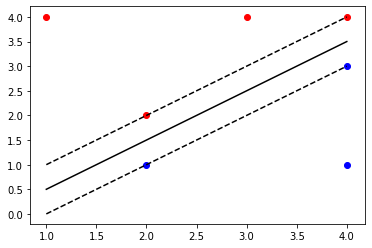

In [73]:
## The Optimal Separating Hyperplane
plt.scatter(X1[Y=="red"], X2[Y=="red"], color = 'red')
plt.scatter(X1[Y=="blue"], X2[Y=="blue"], color = 'blue')
plt.plot([1,2,4], [1,2,4], color = 'black', linestyle = 'dashed')
plt.plot([1,2,4], [0,1,3], color = 'black', linestyle = 'dashed')
plt.plot([1,2,4], [0.5,1.5,3.5], color = 'black', linestyle = 'solid')

f) The Maximal Margin Hyperplane for 2 predictors is $\beta_0 + \beta_1x_1 + \beta_2x_2 = 0$.  Find the coefficienct and Write down the equation.

##### Ans:  The Maximal marginal classifier passes through (2,1.5) and (4, 3.5). So the equation of the hyperplane is 

slope of this line is : $$ m =  \frac{3.5 - 1.5}{4 - 2} = \frac{2}{2} = 1$$ 
and intercept is :  $$ c = 1.5 - 2 = -0.5 $$
$$ x_2 = m\times x_1 + c  $$
$$ x_2 = x_1 - 0.5  $$

The equation of The Maximal marginal classifier is : $$ - 0.5 + x_1 - x_2 = 0 $$



g)  State the Classification Rule for the Maximal margin Classifier your obtained above. Replace the $\beta_0, \beta_1 and \beta_2$.

##### Ans:   We will classify  a new observation with predictors $(x^*_1, x^*_2)$  to Blue class if  

$$  \beta_0 + \beta_1x^*_1 + \beta_2x^*_2  >  0  $$ 

and classify to Red class if 
 
$$  \beta_0 + \beta_1x^*_1 + \beta_2x^*_2  < 0  $$  

h) Will the slight movement of the 7th observation affect the Maximal Margin Hyperplane ?  Explain your answer.

##### Ans. No. 7th observation is not a support vector.

i) Sketch any another Hyperplane that separates the class but is not optimal.

##### Ans: One can simply shift the optimal hyperplane by a small value and get another separating hyperplane but not an optimal one. 

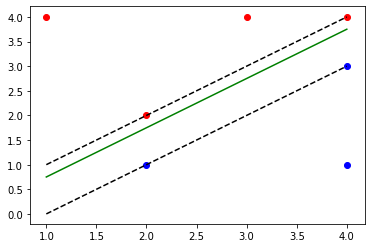

In [179]:
## The Optimal Separating Hyperplane
plt.scatter(X1[Y=="red"], X2[Y=="red"], color = 'red')
plt.scatter(X1[Y=="blue"], X2[Y=="blue"], color = 'blue')
plt.plot([1,2,4], [1,2,4], color = 'black', linestyle = 'dashed')
plt.plot([1,2,4], [0,1,3], color = 'black', linestyle = 'dashed')
plt.plot([1,2,4], [0.75,1.75,3.75], color = 'green', linestyle = 'solid')

j) Add any additional observation on the plot such that the two classes are no longer separable by a Hyperplane. 

###### Ans. We can always add an additional point which violates the class speartion. I am adding a red dot at (3, 1) , you can always choose another one. 

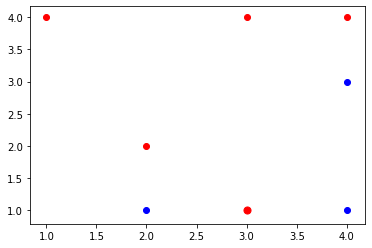

In [182]:
plt.scatter(X1[Y=="red"], X2[Y=="red"], color = 'red')
plt.scatter(X1[Y=="blue"], X2[Y=="blue"], color = 'blue')
plt.scatter(3, 1, color = 'red', s = 50)

# Question 3 ( Programming ) [20 points]

1. Read the data `banknote.csv` and save as `banknote`. Note the labels are given in the columns of `Class`. List all the predictors.

In [184]:
banknote = pd.read_csv('banknote.csv')
list(banknote)

['WaveletVar', 'WaveletSkew', 'WaveletCurt', 'Entropy', 'Class']

2. Write in words what does `variance` , `skewnewss` and `Curtosis` represents ? 

##### Ans:  Variance is a second order moment, Skewness is a third order moment and Curtosis is a third order moment. Essentially they are the expected value of  $X^2, X^3$ and $X^4$.

3. Scatter plot of 2 predictor `WaveletSkew` vs `Entropy` and color the different classes. Should Linear Classifier like Logistic/ LDA/ Support Vector Classifier be a accurate classifier here ? 

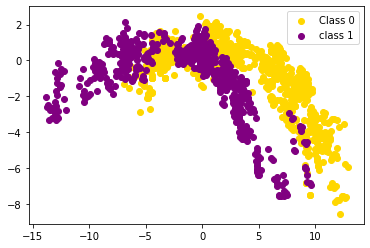

In [195]:
data = banknote.to_numpy()
y    = data[:,-1]
Var  = data[:,0]
Skew = data[:,1]
Curt = data[:,2]
Entropy = data[:,-2]
plt.scatter(Skew[y==0], Entropy[y==0], color = "gold", label = "Class 0")
plt.scatter(Skew[y==1], Entropy[y==1], color = "purple", label = "class 1")
plt.legend()

3. We will expand or enrich the predictor space by adding higher order polynomial moments. Do a 3D Scatter plot on 3 predictors `WaveletSkew`, `WaveletVar` and `WaveletCurt` and color code the observation based on their classes. 

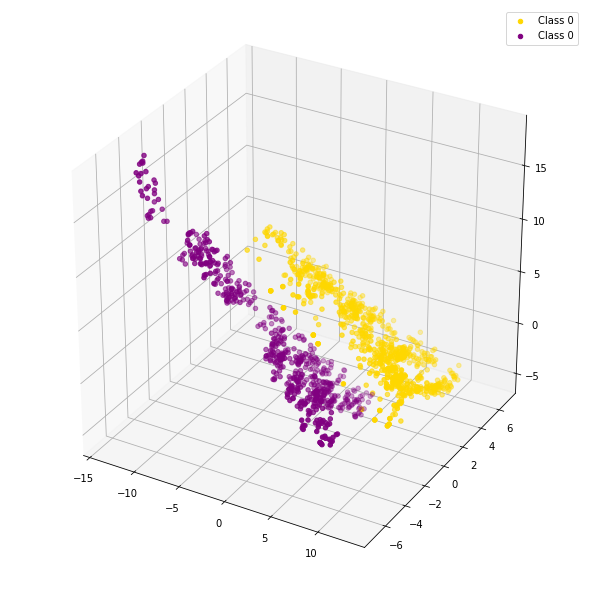

In [198]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(Skew[y==0], Var[y==0], Curt[y==0], color = "gold", label = "Class 0")
ax.scatter(Skew[y==1], Var[y==1], Curt[y==1], color = "purple", label = "Class 0")
plt.legend()

4. After enriching the predictors to higher order polynomial, and moving from predictor dimension p = 2 to p = 3, do you think that the linear classifiers , like, Support Vectors Classifiers or Logistic Regression can be used here ?  

##### ANS: Yes. They can be used. 